<a href="https://colab.research.google.com/github/YABIGAIL23/SIMULACION-I/blob/main/Monte_carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Monte Carlo para Integración

El método de Monte Carlo es una técnica probabilística utilizada para estimar valores numéricos, como la integral de una función. Se basa en la generación de números aleatorios y en la **ley de los grandes números**.

## Error y Precisión
- La precisión del método depende del número de puntos $N$ utilizados.
- A medida que $N$ aumenta, la estimación se vuelve más precisa debido a la **convergencia probabilística**.
- Sin embargo, Monte Carlo es menos eficiente que los métodos deterministas (como la cuadratura de Gauss) en integrales de baja dimensión, pero se vuelve **muy útil en integrales de muchas dimensiones**, donde otros métodos son inviables.


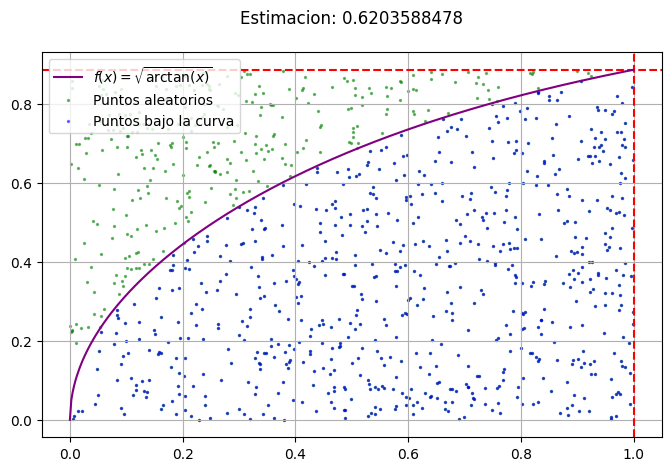

Estimación con Monte Carlo: 0.6203588478
Integral exacta: 0.6298233442
Error: 0.0094644964


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import quad  #Importar la función para la integración exacta

#Funcion
def f(x):
    return np.sqrt(np.arctan(x))

a, b = 0, 1  #Límites

#Puntos para graficar la función
x = np.linspace(a, b, 400)
y = f(x)
N = 1000  #Número de puntos aleatorios

#Estimación con Monte Carlo
def dardos(n):
    dentro = 0
    for _ in range(n):
        x_rand = random.uniform(a, b)
        y_rand = random.uniform(0, f(1))   #Se genera en el rango de la función
        if y_rand <= f(x_rand):
            dentro += 1
    return dentro

def experimento(m):
    lista = []
    for i in range(m):
        d = dardos(N)   #Se usa el mismo número de dardos en cada experimento
        lista.append(d)
    return lista

dentro = dardos(N)
integral_aprox = (b - a) * f(1) * (dentro / N)

integral_exacta, _ = quad(f, a, b )   #Integral exacta utilizando scipy
error = abs(integral_aprox - integral_exacta)   #Error

#GRAFICA
plt.figure(figsize=(8, 5))
plt.axhline(f(1), color="red", linestyle="--")
plt.axvline(1, color="red", linestyle="--")
plt.plot(x, y, label=r'$f(x) = \sqrt{\arctan(x)}$', color='purple')

#Generar puntos aleatorios
x_rand = np.random.uniform(a, b, N)
y_rand = np.random.uniform(0, f(1), N)
plt.scatter(x_rand, y_rand, color="green", s=2, alpha=0.5, label="Puntos aleatorios") #alpha:porcentaje de puntos (0-1)
plt.scatter(x_rand[y_rand <= f(x_rand)], y_rand[y_rand <= f(x_rand)], color="blue", s=2, alpha=0.5, label="Puntos bajo la curva")
plt.legend()
plt.title(f"Estimacion: {integral_aprox:.10f}\n")
plt.grid()
plt.show()

# Imprimir el resultado
print(f"Estimación con Monte Carlo: {integral_aprox:.10f}")
print(f"Integral exacta: {integral_exacta:.10f}")
print(f"Error: {error:.10f}")


## Resumen del Código
El código implementa los siguientes pasos:

- Se define la función $f(x) = \sqrt{\arctan(x)}$.
- Se genera una cantidad de $N$ puntos aleatorios dentro del rectángulo de integración.
- Se cuentan cuántos puntos caen bajo la curva.
- Se estima la integral con Monte Carlo y se compara con la integral exacta calculada con quad de SciPy.
- Se grafica la función junto con los puntos generados para visualizar el método.
